### Task
В данном задании необходимо научить агента побеждать в игре LunarLander при помощи метода DQN или одной из его модификаций.

К заданию нужно приложить код обучения агента (не забудьте зафиксировать seed!), готовый (уже обученный) агент должен быть описан в классе Agent в файле agent.py.

<a href='https://goodboychan.github.io/python/reinforcement_learning/pytorch/udacity/2021/05/07/DQN-LunarLander.html'>Хорошая статья</a>

In [1]:
import gym
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import base64, io

import numpy as np
from collections import deque, namedtuple

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display 
import glob

In [2]:
print(f'gym version: {gym.__version__}')

gym version: 0.26.2


In [3]:
import train as t
import agent as a

In [4]:
%%time
rewards = t.main()

Step: 5000, Reward mean: -244.8953666266002, Reward std: 134.00866672330966
Step: 10000, Reward mean: -176.34989155415005, Reward std: 119.90062765613511
Step: 15000, Reward mean: -221.00927913675673, Reward std: 40.80403442846134
Step: 20000, Reward mean: -382.4687696975522, Reward std: 88.03068463351818
Step: 25000, Reward mean: -286.34540001914695, Reward std: 154.68275205623272
Step: 30000, Reward mean: -363.40311142651547, Reward std: 128.60526832164712
Step: 35000, Reward mean: -157.85620134112057, Reward std: 27.839437687414712
Step: 40000, Reward mean: -77.70345808511519, Reward std: 120.17139564937317
Step: 45000, Reward mean: -105.55772626478392, Reward std: 32.307783104078425
Step: 50000, Reward mean: -295.6697243160212, Reward std: 105.73910805723676
Step: 55000, Reward mean: -73.76985759021346, Reward std: 19.68307819282069
Step: 60000, Reward mean: -116.14247209228661, Reward std: 103.80876376300483
Step: 65000, Reward mean: -169.40381003138353, Reward std: 162.7091055845

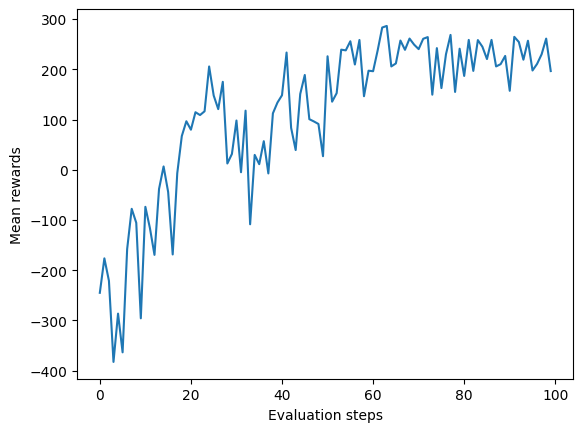

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards)), rewards)
plt.ylabel('Mean rewards')
plt.xlabel('Evaluation steps')
plt.show()

In [6]:
def show_video(env_name, tag='best'):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = f'video/{env_name}_{tag}.mp4'
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")
        
def show_video_of_model(agent, env_name, tag='best'):
    env = gym.make(env_name, render_mode='rgb_array')
    vid = video_recorder.VideoRecorder(env, path=f"video/{env_name}_{tag}.mp4")
    agent.model.load_state_dict(torch.load(f'checkpoint_{tag}.pth'))
    state = env.reset()[0]
    done = False
    while not done:
        frame = env.render()
        vid.capture_frame()
        action = agent.act(state)

        state, reward, done, _, _ = env.step(action)        
    env.close()

In [8]:
agent = a.Agent()
show_video_of_model(agent, 'LunarLander-v2','first')

Moviepy - Building video video/LunarLander-v2_first.mp4.
Moviepy - Writing video video/LunarLander-v2_first.mp4



Moviepy - Done !
Moviepy - video ready video/LunarLander-v2_first.mp4


In [9]:
show_video('LunarLander-v2','first')

In [10]:
agent = a.Agent()
show_video_of_model(agent, 'LunarLander-v2','best')

Moviepy - Building video video/LunarLander-v2_best.mp4.
Moviepy - Writing video video/LunarLander-v2_best.mp4



Moviepy - Done !
Moviepy - video ready video/LunarLander-v2_best.mp4


In [11]:
show_video('LunarLander-v2','best')

In [12]:
def evaluate_policy(agent, episodes=5):
    env = gym.make("LunarLander-v2")
    returns = []
    agent.model.eval()
    for j in range(episodes):
        done = False
        state = env.reset()[0]
        total_reward = 0.
        
        tries = 0
        while not done and tries < 1000:
            tries += 1
            state, reward, done, _, _ = env.step(agent.act(state))
            total_reward += reward
        returns.append(total_reward)
    agent.model.train()
    return returns

In [13]:
agent = a.Agent()
returns_check = evaluate_policy(agent, episodes=50)

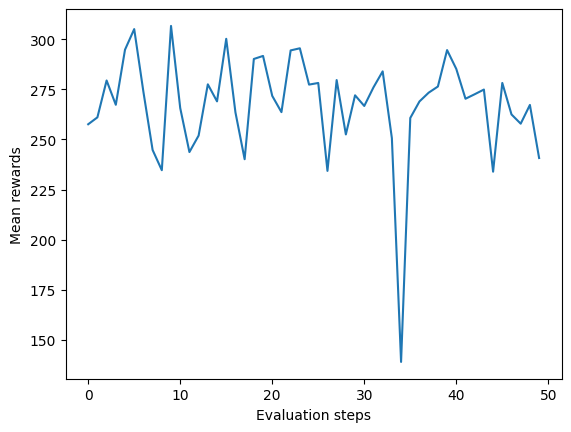

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(returns_check)), returns_check)
plt.ylabel('Mean rewards')
plt.xlabel('Evaluation steps')
plt.show()